In [3]:
# Import libraries
import moments, moments.LD
import pandas as pd, numpy as np
from collections import defaultdict
import demes, demesdraw, matplotlib.pylab as plt
import msprime as ms

import model, slice, get_LD, plot_LD

In [4]:
#! wget https://raw.githubusercontent.com/apragsdale/african-structure-paper/main/demes_models/merger_with_stem_migration.yaml

In [5]:
mws = model.load_yaml("merger_with_stem_migration.yaml")

In [6]:
def plot_comparison(LDpop1,LDpop2,labels=["Original","Size Change"]):
    rhos = np.logspace(-2, 2, 21)
    
    # plot D2
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax.plot(rhos,LDpop1[:,0],label=labels[0])
    ax.plot(rhos,LDpop2[:,0],label=labels[1])
    ax.legend()
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"$\sigma_d^2$")
    ax.set_xlabel(r"$\rho$")

    # plot DZ
    ax2.plot(rhos,LDpop1[:,1],label=labels[0])
    ax2.plot(rhos,LDpop2[:,1],label=labels[1])
    ax2.legend()
    ax2.set_yscale("log")
    ax2.set_xscale("log")
    ax2.set_ylabel(r"$\sigma_{Dz}$")
    ax2.set_xlabel(r"$\rho$")

    plt.tight_layout()
    plt.show()

def plot_iicr(iirc,T): 
    plt.plot(T, iirc)
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("time ago (years)",fontsize = 14)
    plt.ylabel(r"IICR",fontsize = 14);

<AxesSubplot:ylabel='time ago (years)'>

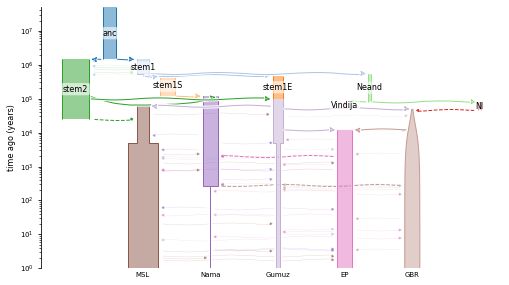

In [7]:
demesdraw.tubes(mws, log_time=True, num_lines_per_migration=3)

In [8]:
T,times_dic = slice.sample_timepoints(mws,100,10e7)

In [9]:
times_in_gen = T/29
times_in_gen[0] = 1

In [10]:
#### CHANGE THIS
# Compute LD from present day pops in model
mws_sliced = slice.slice_timepoints(mws,time_points=[0])
mws_sliced_LD = get_LD.get_LD_from_sliced_demes(mws_sliced,normalize=False)

MENDE (MSL)

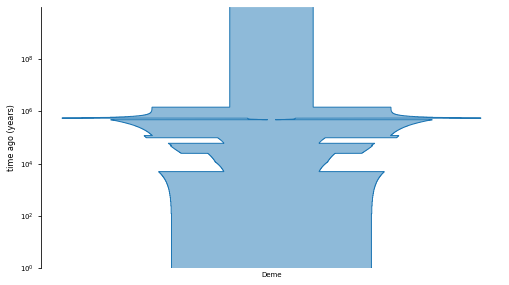

In [11]:
msl_R, msl_iicr, _ = model.get_iicr(mws,pop="MSL",T=times_in_gen)
msl_sc = model.size_change_from_iicr(msl_iicr,T,time_units="years")

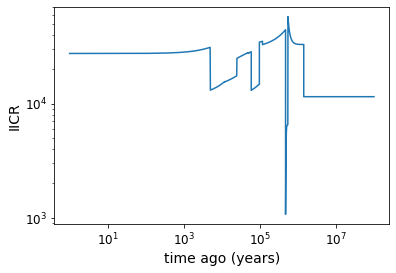

In [12]:
plot_iicr(msl_iicr,T)

In [13]:
# Actually slice
msl_sliced = slice.slice_timepoints(msl_sc,time_points=[0])
msl_sliced_LD = get_LD.get_LD_from_sliced_demes(msl_sliced,normalize=False)


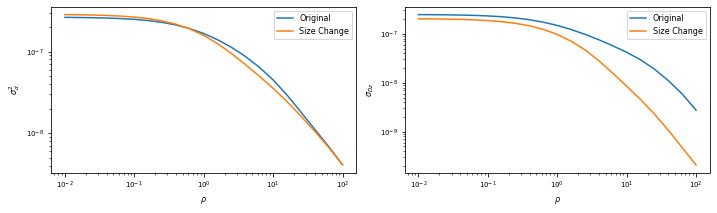

In [14]:
plot_comparison(mws_sliced_LD['MSL'][-1],msl_sliced_LD['Deme'][-1])

Nama

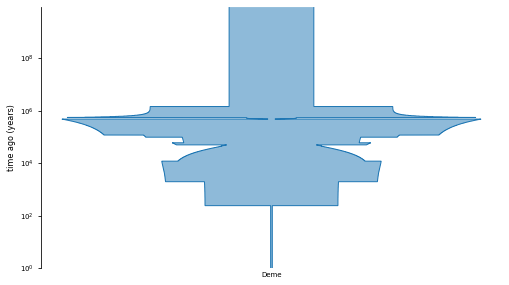

In [15]:
nama_R,nama_iicr, _ = model.get_iicr(mws,pop="Nama",T=times_in_gen)
nama_sc = model.size_change_from_iicr(nama_iicr,T,time_units="years")

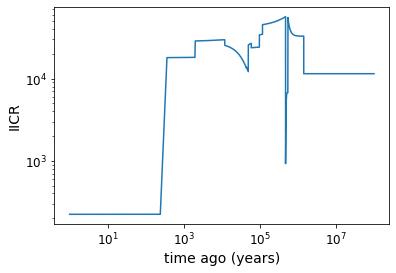

In [16]:
plot_iicr(nama_iicr,T)

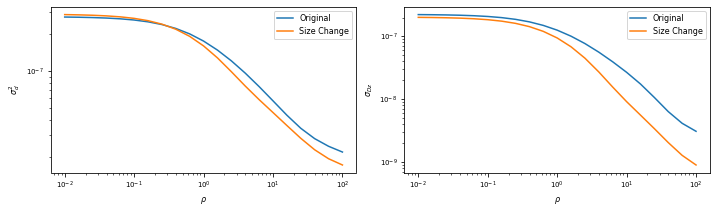

In [17]:
# Actually slice
nama_sliced = slice.slice_timepoints(nama_sc,time_points=[0])
nama_sliced_LD = get_LD.get_LD_from_sliced_demes(nama_sliced,normalize=False)
plot_comparison(mws_sliced_LD['Nama'][-1],nama_sliced_LD['Deme'][-1])

Gumuz

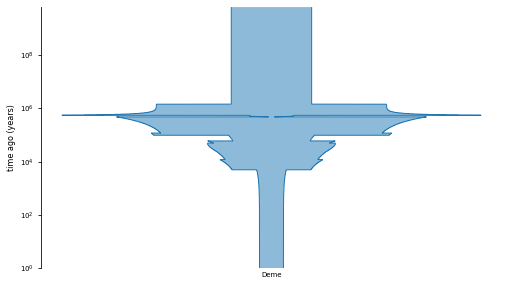

In [18]:
Gumuz_R,Gumuz_iicr, _ = model.get_iicr(mws,pop="Gumuz",T=times_in_gen)
Gumuz_sc = model.size_change_from_iicr(Gumuz_iicr,T,time_units="years")

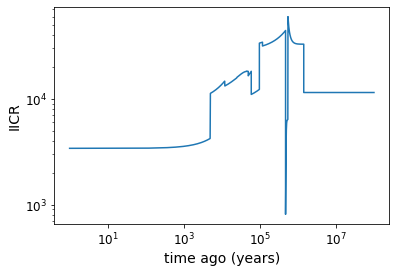

In [19]:
plot_iicr(Gumuz_iicr,T)

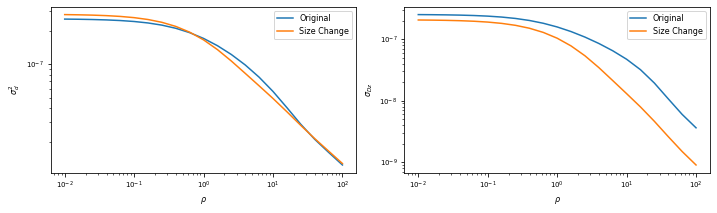

In [20]:
# Actually slice
gumuz_sliced = slice.slice_timepoints(Gumuz_sc,time_points=[0])
gumuz_sliced_LD = get_LD.get_LD_from_sliced_demes(gumuz_sliced,normalize=False)
plot_comparison(mws_sliced_LD['Gumuz'][-1],gumuz_sliced_LD['Deme'][-1])

EP

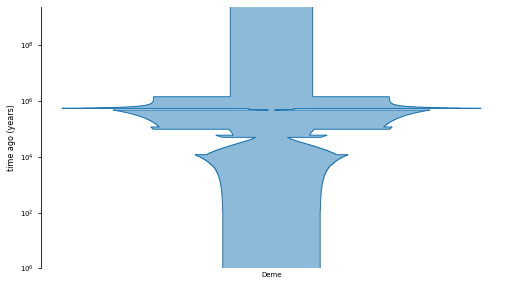

In [21]:
EP_R,EP_iicr, _ = model.get_iicr(mws,pop="EP",T=times_in_gen)
EP_sc = model.size_change_from_iicr(EP_iicr,T,time_units="years")

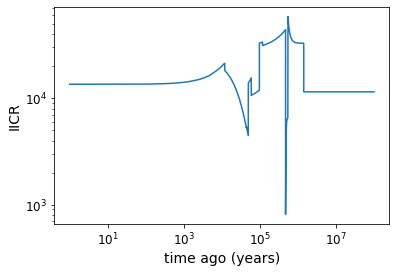

In [22]:
plot_iicr(EP_iicr,T)

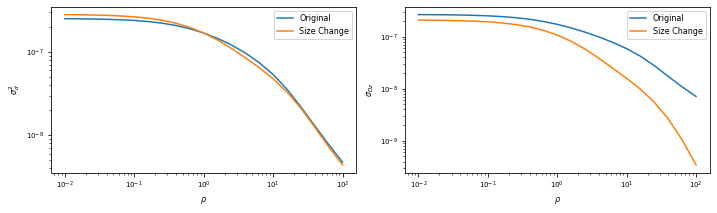

In [23]:
# Actually slice
EP_sliced = slice.slice_timepoints(EP_sc,time_points=[0])
EP_sliced_LD = get_LD.get_LD_from_sliced_demes(EP_sliced,normalize=False)
plot_comparison(mws_sliced_LD['EP'][-1],EP_sliced_LD['Deme'][-1])

GBR

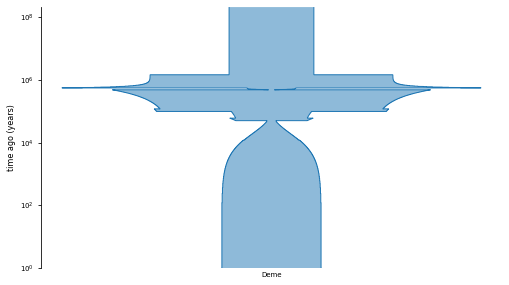

In [24]:
GBR_R,GBR_iicr, _ = model.get_iicr(mws,pop="GBR",T=times_in_gen)
GBR_sc = model.size_change_from_iicr(GBR_iicr,T,time_units="years")

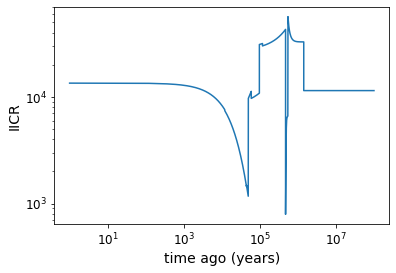

In [25]:
plot_iicr(GBR_iicr,T)

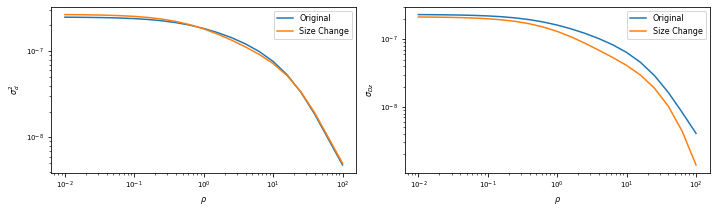

In [26]:
# Actually slice
GBR_sliced = slice.slice_timepoints(GBR_sc,time_points=[0])
GBR_sliced_LD = get_LD.get_LD_from_sliced_demes(GBR_sliced,normalize=False)
plot_comparison(mws_sliced_LD['GBR'][-1],GBR_sliced_LD['Deme'][-1])

Ancestral population

In [27]:
anc_sliced = slice.slice_timepoints(mws,time_points=[mws['anc'].end_time])
anc_sliced_LD = get_LD.get_LD_from_sliced_demes(anc_sliced,normalize=False)

In [28]:
anc_times = times_dic['anc']
anc_times_in_gen = anc_times/29
anc_times_in_gen[0] = 1

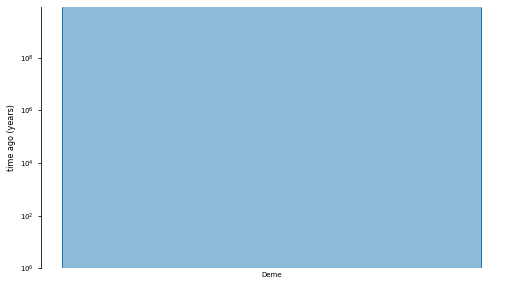

In [29]:
anc_R,anc_iicr, _ = model.get_iicr(anc_sliced[1442022],pop="anc",T=anc_times_in_gen)
anc_sc = model.size_change_from_iicr(anc_iicr,anc_times,time_units="years")

In [30]:
anc_sliced_LD

defaultdict(list,
            {'anc': [array([[1.38030127e-07, 1.10313788e-07, 3.05156894e-07],
                     [1.37532831e-07, 1.09852161e-07, 3.04926080e-07],
                     [1.36752094e-07, 1.09127559e-07, 3.04563779e-07],
                     [1.35533012e-07, 1.07996468e-07, 3.03998234e-07],
                     [1.33645547e-07, 1.06246070e-07, 3.03123035e-07],
                     [1.30761264e-07, 1.03573278e-07, 3.01786639e-07],
                     [1.26440709e-07, 9.95744189e-08, 2.99787209e-07],
                     [1.20158069e-07, 9.37710336e-08, 2.96885517e-07],
                     [1.11405669e-07, 8.57122683e-08, 2.92856134e-07],
                     [9.99129368e-08, 7.51864078e-08, 2.87593204e-07],
                     [8.59375000e-08, 6.25000000e-08, 2.81250000e-07],
                     [7.04411583e-08, 4.86434581e-08, 2.74321729e-07],
                     [5.49112822e-08, 3.51098341e-08, 2.67554917e-07],
                     [4.08312031e-08, 2.33637043e-08

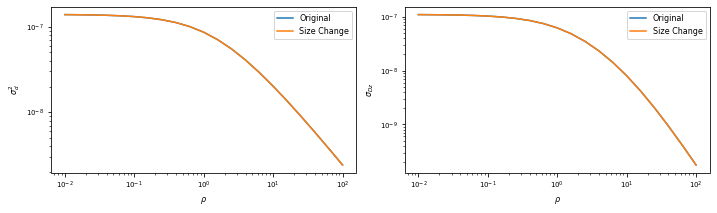

In [31]:
# Actually slice
anc_sc_sliced = slice.slice_timepoints(anc_sc,time_points=[0])
anc_sc_sliced_LD = get_LD.get_LD_from_sliced_demes(anc_sc_sliced,normalize=False)
plot_comparison(anc_sliced_LD['anc'][-1],anc_sc_sliced_LD['Deme'][-1])

All pops model - LD

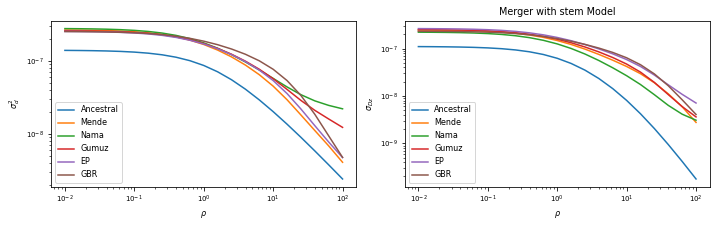

In [32]:
rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(rhos,anc_sliced_LD['anc'][-1][:,0],label="Ancestral")
ax.plot(rhos,mws_sliced_LD['MSL'][-1][:,0],label="Mende")
ax.plot(rhos,mws_sliced_LD['Nama'][-1][:,0],label="Nama")
ax.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,0],label="Gumuz")
ax.plot(rhos,mws_sliced_LD['EP'][-1][:,0],label="EP")
ax.plot(rhos,mws_sliced_LD['GBR'][-1][:,0],label="GBR")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$")
ax.set_xlabel(r"$\rho$")

# plot DZ
ax2.plot(rhos,anc_sliced_LD['anc'][-1][:,1],label="Ancestral")
ax2.plot(rhos,mws_sliced_LD['MSL'][-1][:,1],label="Mende")
ax2.plot(rhos,mws_sliced_LD['Nama'][-1][:,1],label="Nama")
ax2.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,1],label="Gumuz")
ax2.plot(rhos,mws_sliced_LD['EP'][-1][:,1],label="EP")
ax2.plot(rhos,mws_sliced_LD['GBR'][-1][:,1],label="GBR")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$")
ax2.set_xlabel(r"$\rho$")

plt.tight_layout()
plt.title("Merger with stem Model")
plt.savefig("Dstats_allpops_mergerwithstem_unnormalized.pdf",format='pdf',transparent = False)
#plt.show()

All pops Pop size change from IICR - LD

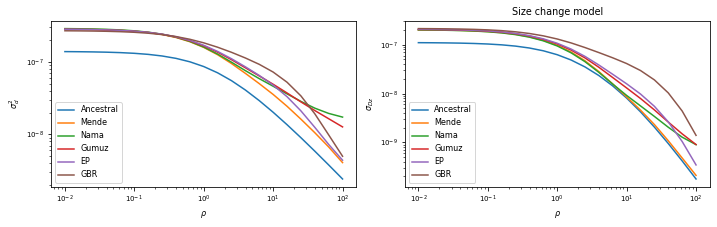

In [33]:
rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,0],label="Ancestral")
ax.plot(rhos,msl_sliced_LD['Deme'][-1][:,0],label="Mende")
ax.plot(rhos,nama_sliced_LD['Deme'][-1][:,0],label="Nama")
ax.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,0],label="Gumuz")
ax.plot(rhos,EP_sliced_LD['Deme'][-1][:,0],label="EP")
ax.plot(rhos,GBR_sliced_LD['Deme'][-1][:,0],label="GBR")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$")
ax.set_xlabel(r"$\rho$")

# plot DZ
ax2.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,1],label="Ancestral")
ax2.plot(rhos,msl_sliced_LD['Deme'][-1][:,1],label="Mende")
ax2.plot(rhos,nama_sliced_LD['Deme'][-1][:,1],label="Nama")
ax2.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,1],label="Gumuz")
ax2.plot(rhos,EP_sliced_LD['Deme'][-1][:,1],label="EP")
ax2.plot(rhos,GBR_sliced_LD['Deme'][-1][:,1],label="GBR")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$")
ax2.set_xlabel(r"$\rho$")

plt.tight_layout()
plt.title("Size change model")
plt.savefig("Dstats_allpops_sizechange_unnormalized.pdf",format='pdf',transparent = False)
#plt.show()

In [34]:
anc_sc_sliced_LD['Deme']

[array([[1.38025052e-07, 1.10309105e-07, 3.05149836e-07],
        [1.37527786e-07, 1.09847508e-07, 3.04919041e-07],
        [1.36747096e-07, 1.09122952e-07, 3.04556768e-07],
        [1.35528088e-07, 1.07991933e-07, 3.03991265e-07],
        [1.33640736e-07, 1.06241646e-07, 3.03116133e-07],
        [1.30756622e-07, 1.03569020e-07, 3.01779838e-07],
        [1.26436317e-07, 9.95704047e-08, 2.99780558e-07],
        [1.20154029e-07, 9.37673640e-08, 2.96879077e-07],
        [1.11402097e-07, 8.57090574e-08, 2.92849979e-07],
        [9.99099398e-08, 7.51837601e-08, 2.87587405e-07],
        [8.59351384e-08, 6.24979746e-08, 2.81244605e-07],
        [7.04394166e-08, 4.86420373e-08, 2.74316742e-07],
        [5.49100695e-08, 3.51089223e-08, 2.67550292e-07],
        [4.08303903e-08, 2.33631644e-08, 2.61677508e-07],
        [2.91580334e-08, 1.43022551e-08, 2.57147126e-07],
        [2.01609416e-08, 8.06436126e-09, 2.54028226e-07],
        [1.35980403e-08, 4.20845903e-09, 2.52100302e-07],
        [9.000

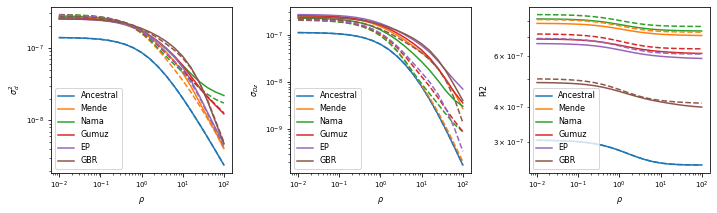

In [35]:
rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.plot(rhos,anc_sliced_LD['anc'][-1][:,0],label="Ancestral")
ax.plot(rhos,mws_sliced_LD['MSL'][-1][:,0],label="Mende")
ax.plot(rhos,mws_sliced_LD['Nama'][-1][:,0],label="Nama")
ax.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,0],label="Gumuz")
ax.plot(rhos,mws_sliced_LD['EP'][-1][:,0],label="EP")
ax.plot(rhos,mws_sliced_LD['GBR'][-1][:,0],label="GBR")

ax.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,0],'--',color="tab:blue")
ax.plot(rhos,msl_sliced_LD['Deme'][-1][:,0],'--',color="tab:orange")
ax.plot(rhos,nama_sliced_LD['Deme'][-1][:,0],'--',color="tab:green")
ax.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,0],'--',color="tab:red")
ax.plot(rhos,EP_sliced_LD['Deme'][-1][:,0],'--',color="tab:purple")
ax.plot(rhos,GBR_sliced_LD['Deme'][-1][:,0],'--',color="tab:brown")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$")
ax.set_xlabel(r"$\rho$")

# plot DZ
ax2.plot(rhos,anc_sliced_LD['anc'][-1][:,1],label="Ancestral")
ax2.plot(rhos,mws_sliced_LD['MSL'][-1][:,1],label="Mende")
ax2.plot(rhos,mws_sliced_LD['Nama'][-1][:,1],label="Nama")
ax2.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,1],label="Gumuz")
ax2.plot(rhos,mws_sliced_LD['EP'][-1][:,1],label="EP")
ax2.plot(rhos,mws_sliced_LD['GBR'][-1][:,1],label="GBR")

ax2.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,1],'--',color="tab:blue")
ax2.plot(rhos,msl_sliced_LD['Deme'][-1][:,1],'--',color="tab:orange")
ax2.plot(rhos,nama_sliced_LD['Deme'][-1][:,1],'--',color="tab:green")
ax2.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,1],'--',color="tab:red")
ax2.plot(rhos,EP_sliced_LD['Deme'][-1][:,1],'--',color="tab:purple")
ax2.plot(rhos,GBR_sliced_LD['Deme'][-1][:,1],'--',color="tab:brown")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$")
ax2.set_xlabel(r"$\rho$")

# plot Pi2
ax3.plot(rhos,anc_sliced_LD['anc'][-1][:,2],label="Ancestral")
ax3.plot(rhos,mws_sliced_LD['MSL'][-1][:,2],label="Mende")
ax3.plot(rhos,mws_sliced_LD['Nama'][-1][:,2],label="Nama")
ax3.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,2],label="Gumuz")
ax3.plot(rhos,mws_sliced_LD['EP'][-1][:,2],label="EP")
ax3.plot(rhos,mws_sliced_LD['GBR'][-1][:,2],label="GBR")

ax3.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,2],'--',color="tab:blue")
ax3.plot(rhos,msl_sliced_LD['Deme'][-1][:,2],'--',color="tab:orange")
ax3.plot(rhos,nama_sliced_LD['Deme'][-1][:,2],'--',color="tab:green")
ax3.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,2],'--',color="tab:red")
ax3.plot(rhos,EP_sliced_LD['Deme'][-1][:,2],'--',color="tab:purple")
ax3.plot(rhos,GBR_sliced_LD['Deme'][-1][:,2],'--',color="tab:brown")

ax3.legend()
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_ylabel(r"Pi2")
ax3.set_xlabel(r"$\rho$")

plt.tight_layout()
plt.savefig("Dstats_allpops_unnormalized_pi2.pdf",format='pdf',transparent = False)
#plt.show()

In [36]:
anc_sliced_LD['anc']

[array([[1.38030127e-07, 1.10313788e-07, 3.05156894e-07],
        [1.37532831e-07, 1.09852161e-07, 3.04926080e-07],
        [1.36752094e-07, 1.09127559e-07, 3.04563779e-07],
        [1.35533012e-07, 1.07996468e-07, 3.03998234e-07],
        [1.33645547e-07, 1.06246070e-07, 3.03123035e-07],
        [1.30761264e-07, 1.03573278e-07, 3.01786639e-07],
        [1.26440709e-07, 9.95744189e-08, 2.99787209e-07],
        [1.20158069e-07, 9.37710336e-08, 2.96885517e-07],
        [1.11405669e-07, 8.57122683e-08, 2.92856134e-07],
        [9.99129368e-08, 7.51864078e-08, 2.87593204e-07],
        [8.59375000e-08, 6.25000000e-08, 2.81250000e-07],
        [7.04411583e-08, 4.86434581e-08, 2.74321729e-07],
        [5.49112822e-08, 3.51098341e-08, 2.67554917e-07],
        [4.08312031e-08, 2.33637043e-08, 2.61681852e-07],
        [2.91585680e-08, 1.43025533e-08, 2.57151277e-07],
        [2.01612903e-08, 8.06451613e-09, 2.54032258e-07],
        [1.35982667e-08, 4.20853494e-09, 2.52104267e-07],
        [9.000

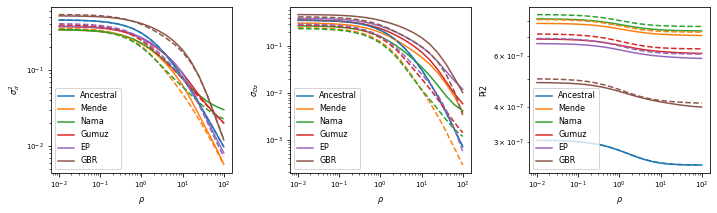

In [37]:
rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.plot(rhos,anc_sliced_LD['anc'][-1][:,0]/anc_sliced_LD['anc'][-1][:,2],label="Ancestral")
ax.plot(rhos,mws_sliced_LD['MSL'][-1][:,0]/mws_sliced_LD['MSL'][-1][:,2],label="Mende")
ax.plot(rhos,mws_sliced_LD['Nama'][-1][:,0]/mws_sliced_LD['Nama'][-1][:,2],label="Nama")
ax.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,0]/mws_sliced_LD['Gumuz'][-1][:,2],label="Gumuz")
ax.plot(rhos,mws_sliced_LD['EP'][-1][:,0]/mws_sliced_LD['EP'][-1][:,2],label="EP")
ax.plot(rhos,mws_sliced_LD['GBR'][-1][:,0]/mws_sliced_LD['GBR'][-1][:,2],label="GBR")

ax.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,0]/anc_sc_sliced_LD['Deme'][-1][:,2],'--',color="tab:blue")
ax.plot(rhos,msl_sliced_LD['Deme'][-1][:,0]/msl_sliced_LD['Deme'][-1][:,2],'--',color="tab:orange")
ax.plot(rhos,nama_sliced_LD['Deme'][-1][:,0]/nama_sliced_LD['Deme'][-1][:,2],'--',color="tab:green")
ax.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,0]/gumuz_sliced_LD['Deme'][-1][:,2],'--',color="tab:red")
ax.plot(rhos,EP_sliced_LD['Deme'][-1][:,0]/EP_sliced_LD['Deme'][-1][:,2],'--',color="tab:purple")
ax.plot(rhos,GBR_sliced_LD['Deme'][-1][:,0]/GBR_sliced_LD['Deme'][-1][:,2],'--',color="tab:brown")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$")
ax.set_xlabel(r"$\rho$")

# plot DZ
ax2.plot(rhos,anc_sliced_LD['anc'][-1][:,1]/anc_sliced_LD['anc'][-1][:,2],label="Ancestral")
ax2.plot(rhos,mws_sliced_LD['MSL'][-1][:,1]/mws_sliced_LD['MSL'][-1][:,2],label="Mende")
ax2.plot(rhos,mws_sliced_LD['Nama'][-1][:,1]/mws_sliced_LD['Nama'][-1][:,2],label="Nama")
ax2.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,1]/mws_sliced_LD['Gumuz'][-1][:,2],label="Gumuz")
ax2.plot(rhos,mws_sliced_LD['EP'][-1][:,1]/mws_sliced_LD['EP'][-1][:,2],label="EP")
ax2.plot(rhos,mws_sliced_LD['GBR'][-1][:,1]/mws_sliced_LD['GBR'][-1][:,2],label="GBR")

ax2.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,1]/anc_sc_sliced_LD['Deme'][-1][:,2],'--',color="tab:blue")
ax2.plot(rhos,msl_sliced_LD['Deme'][-1][:,1]/msl_sliced_LD['Deme'][-1][:,2],'--',color="tab:orange")
ax2.plot(rhos,nama_sliced_LD['Deme'][-1][:,1]/nama_sliced_LD['Deme'][-1][:,2],'--',color="tab:green")
ax2.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,1]/gumuz_sliced_LD['Deme'][-1][:,2],'--',color="tab:red")
ax2.plot(rhos,EP_sliced_LD['Deme'][-1][:,1]/EP_sliced_LD['Deme'][-1][:,2],'--',color="tab:purple")
ax2.plot(rhos,GBR_sliced_LD['Deme'][-1][:,1]/GBR_sliced_LD['Deme'][-1][:,2],'--',color="tab:brown")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$")
ax2.set_xlabel(r"$\rho$")

# plot Pi2
ax3.plot(rhos,anc_sliced_LD['anc'][-1][:,2],label="Ancestral")
ax3.plot(rhos,mws_sliced_LD['MSL'][-1][:,2],label="Mende")
ax3.plot(rhos,mws_sliced_LD['Nama'][-1][:,2],label="Nama")
ax3.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,2],label="Gumuz")
ax3.plot(rhos,mws_sliced_LD['EP'][-1][:,2],label="EP")
ax3.plot(rhos,mws_sliced_LD['GBR'][-1][:,2],label="GBR")

ax3.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,2],'--',color="tab:blue")
ax3.plot(rhos,msl_sliced_LD['Deme'][-1][:,2],'--',color="tab:orange")
ax3.plot(rhos,nama_sliced_LD['Deme'][-1][:,2],'--',color="tab:green")
ax3.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,2],'--',color="tab:red")
ax3.plot(rhos,EP_sliced_LD['Deme'][-1][:,2],'--',color="tab:purple")
ax3.plot(rhos,GBR_sliced_LD['Deme'][-1][:,2],'--',color="tab:brown")

ax3.legend()
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_ylabel(r"Pi2")
ax3.set_xlabel(r"$\rho$")

plt.tight_layout()
plt.savefig("Dstats_allpops_manualnorm.pdf",format='pdf',transparent = False)
#plt.show()

All pops model - IIRC

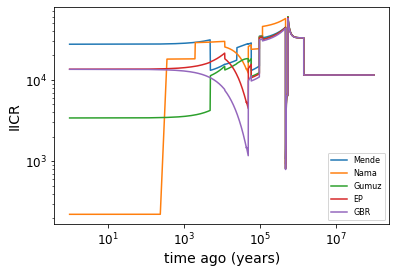

In [38]:
plt.plot(T, msl_iicr,label="Mende") #Mende
plt.plot(T, nama_iicr, label="Nama") #Nama
plt.plot(T, Gumuz_iicr, label="Gumuz") #Gumuz
plt.plot(T, EP_iicr,label="EP") #EP
plt.plot(T, GBR_iicr,label="GBR") #GBR
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"IICR",fontsize = 14);
plt.savefig("IIRC_mws_allpops.pdf",format='pdf',transparent = False)

------

The mende had recent migration with the GBR